In [68]:
# Step 1: 导入常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Step 2: 读取数据
url = "https://raw.githubusercontent.com/JamesLo94/schulich_data_science/main/credit_card_default/UCI_Credit_Card.csv"
df = pd.read_csv(url)


In [69]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [71]:
# Step 3: 数据初探
print("数据基本情况：")
print(df.head())
print("数据维度：", df.shape)
print("每列缺失值：\n", df.isnull().sum())

数据基本情况：
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6

In [72]:
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [73]:
df.shape

(30000, 25)

In [74]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [75]:
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [76]:
# Remove ID
df = df.drop('ID', axis=1)

In [77]:
# Education column should range from 1 to 6
# min(education) is 0 and 5, 6 are unknow
# convert 0, 5, 6 to 4
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)

In [78]:
# Marriage column should range from 1 to 3
# min(marriage) is 0
# convert 0 to 3
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [79]:
# pay_0 ~ pay_6 columns should range from -1 to 9
# the minimum values are -2, it should be converted to -1
# regard it as pay duly
for col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[col] = df[col].replace(-2, -1)

In [80]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,0.075267,-0.007700,-0.030033,-0.075733,-0.114667,-0.127933,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,0.990775,1.035798,1.025036,0.987436,0.941921,0.949384,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [81]:
df[['EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].value_counts()

EDUCATION  MARRIAGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
2          2          0      0      0      0      0      0       2616
           1          0      0      0      0      0      0       2413
1          2          0      0      0      0      0      0       2028
                     -1     -1     -1     -1     -1     -1       1485
           1         -1     -1     -1     -1     -1     -1       1163
                                                                 ... 
2          2          2      3      3      2      2      2          1
1          2          2      2      4      4      3      2          1
2          2          2      3      2      2      2      3          1
1          2          2      2      6      6      5      4          1
4          3          2      2      0      0      0      0          1
Name: count, Length: 2325, dtype: int64

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


<Axes: xlabel='default.payment.next.month', ylabel='count'>

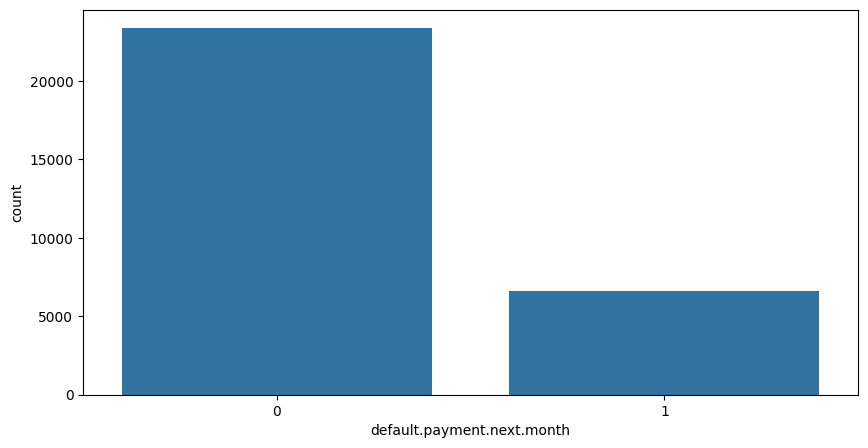

In [82]:
print(df['default.payment.next.month'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x = 'default.payment.next.month', data = df)

C:\Users\q\AppData\Local\Temp\ipykernel_12344\2386985435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Defaulter'] = df['default.payment.next.month']
C:\Users\q\AppData\Local\Temp\ipykernel_12344\2386985435.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


<Figure size 1000x500 with 0 Axes>

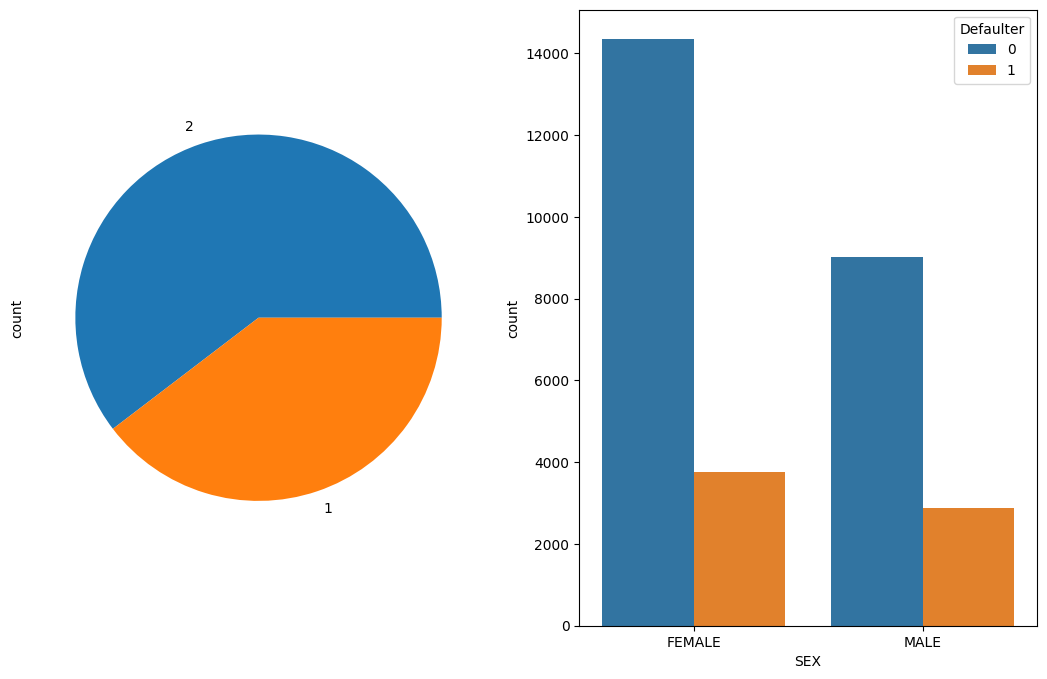

<Figure size 1000x500 with 0 Axes>

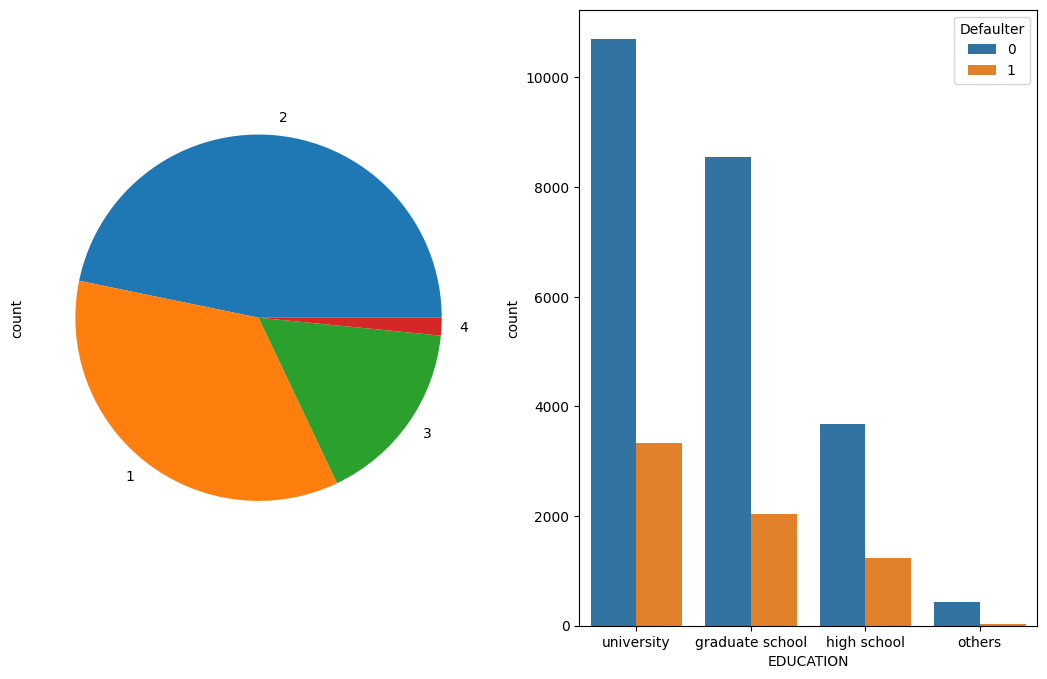

<Figure size 1000x500 with 0 Axes>

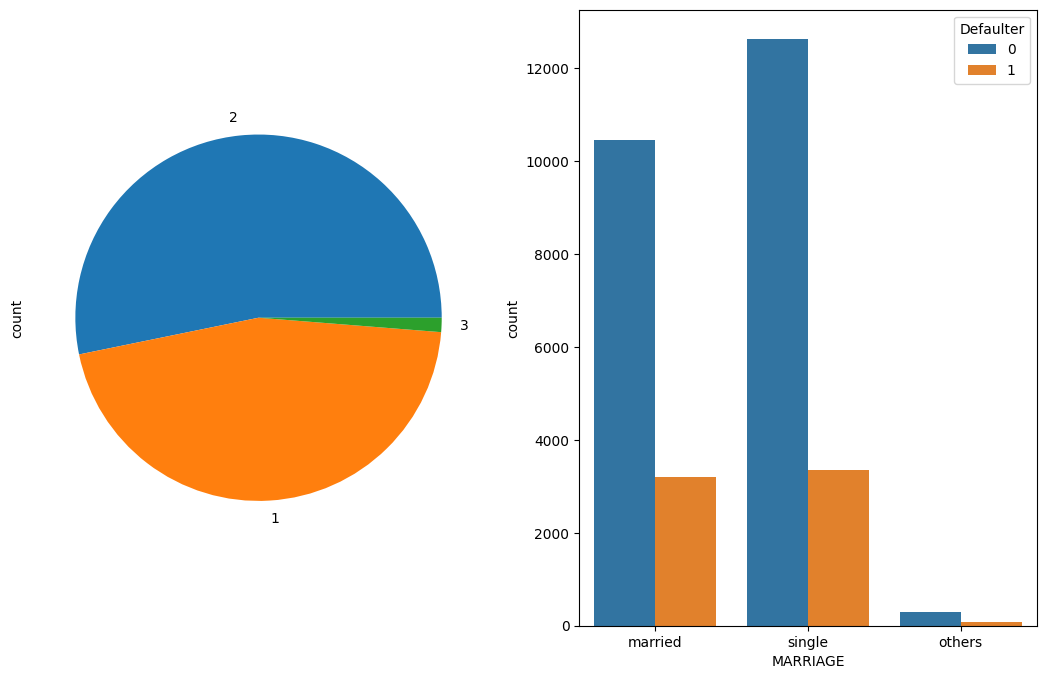

In [83]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

df_cat = df[categorical_features]
df_cat['Defaulter'] = df['default.payment.next.month']

df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

In [84]:
# 年龄分箱
df['AGE_BIN'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 100], labels=[1, 2, 3, 4, 5])

# 额度分箱
df['LIMIT_BAL_BIN'] = pd.cut(df['LIMIT_BAL'], bins=[0, 50000, 100000, 200000, 500000, 1000000], labels=[1,2,3,4,5])

In [85]:
# 还款率：还款率能直观反映客户的还款意愿。
# 防止分母为0加1
for i in range(1, 7):
    # 还款率
    df[f'REPAY_RATIO{i}'] = df[f'PAY_AMT{i}'] / (df[f'BILL_AMT{i}'] + 1)
    # 是否有账单（大于0算有账单，否则为0）
    df[f'BILL_FLAG{i}'] = (df[f'BILL_AMT{i}'] > 0).astype(int)

# 账单金额变化率：有助于捕捉消费或还款习惯的变化。
df['BILL_AMT_CHANGE'] = df['BILL_AMT1'] - df['BILL_AMT2']

In [87]:
# 统一处理所有连续变量的 inf 和 NaN

numeric_cols = [col for col in df.columns if (('AMT' in col) or ('RATIO' in col) or ('CHANGE' in col)) or (col in ['AGE','LIMIT_BAL'])]

df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)
df[numeric_cols] = df[numeric_cols].fillna(0)


In [88]:
print(df[['REPAY_RATIO1','REPAY_RATIO2','REPAY_RATIO3','REPAY_RATIO4','REPAY_RATIO5','REPAY_RATIO6']].describe())
print(df[['BILL_FLAG1','BILL_FLAG2','BILL_FLAG3','BILL_FLAG4','BILL_FLAG5','BILL_FLAG6']].sum())


        REPAY_RATIO1   REPAY_RATIO2   REPAY_RATIO3   REPAY_RATIO4  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean       93.221758     190.935478     177.486288     179.236452   
std      2691.882416    4475.131600    4244.076983    3707.586408   
min    -10883.250000  -20519.000000 -120444.000000  -25900.000000   
25%         0.034330       0.030981       0.020020       0.014194   
50%         0.055519       0.053588       0.043666       0.039223   
75%         0.262241       0.250599       0.194799       0.166006   
max    298887.000000  285138.000000  288921.000000  330982.000000   

        REPAY_RATIO5   REPAY_RATIO6  
count   30000.000000   30000.000000  
mean      198.055142     229.774867  
std      3901.584103    4596.269001  
min     -7899.722222  -13241.166667  
25%         0.015210       0.000123  
50%         0.041399       0.040878  
75%         0.194270       0.203702  
max    330982.000000  279260.000000  
BILL_FLAG1    27402
BILL_FLAG2    26

In [111]:
# 有极端值所以截断，才能用于Logistic regression，但random forest, XGBoost对极端值不敏感，可以不用截断   
for i in range(1, 7):
    df[f'REPAY_RATIO{i}'] = df[f'REPAY_RATIO{i}'].clip(-10, 10)

In [112]:
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

In [113]:
# 1. 连续变量
num_cols = [
    'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'BILL_AMT_CHANGE',
    'REPAY_RATIO1', 'REPAY_RATIO2', 'REPAY_RATIO3', 'REPAY_RATIO4', 'REPAY_RATIO5', 'REPAY_RATIO6'
]

# 2. 分箱变量（按你的命名，假设为）
cate_cols = ['AGE_BIN', 'LIMIT_BAL_BIN']

# 3. 类别变量
category_vars = ['EDUCATION', 'SEX', 'MARRIAGE']


In [114]:
# Standarize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

In [115]:
# One-hot encode
X_cate = pd.get_dummies(df[cate_cols + category_vars], drop_first=True)

In [116]:
flag_cols = [f'BILL_FLAG{i}' for i in range(1, 7)]
X_flag = df[flag_cols]

# 合并所有特征
X_all = pd.concat([X_num, X_cate, X_flag], axis=1)


In [117]:
y = df['default.payment.next.month']


In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.3, random_state=42, stratify=y
)

In [119]:
print('Default rate for training:', y_train.mean())
print('Default rate for testing:', y_test.mean())

Default rate for training: 0.2211904761904762
Default rate for testing: 0.2212222222222222


In [120]:
# 建立并训练模型
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

# 预测
y_pred_lr = lr.predict(X_test)


In [121]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("【Logistic Regression】Result:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr))


【Logistic Regression】Result:
              precision    recall  f1-score   support

           0       0.86      0.55      0.67      7009
           1       0.30      0.68      0.42      1991

    accuracy                           0.58      9000
   macro avg       0.58      0.62      0.54      9000
weighted avg       0.74      0.58      0.61      9000

Accuracy:  0.579
Confusion Matrix: 
 [[3849 3160]
 [ 629 1362]]


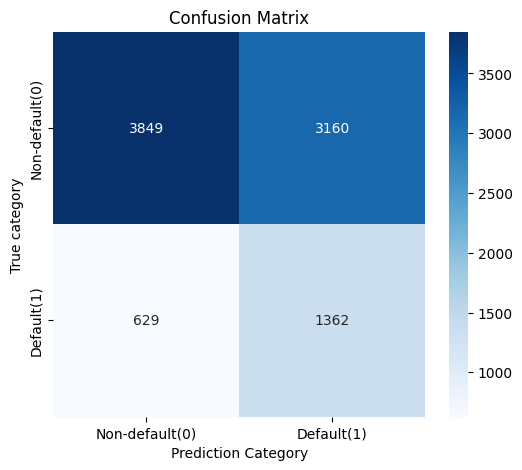

In [122]:
cm = confusion_matrix(y_test, y_pred_lr)
labels = ['Non-default(0)', 'Default(1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediction Category')
plt.ylabel('True category')
plt.title('Confusion Matrix')
plt.show()

In [123]:
y_proba_lr = lr.predict_proba(X_test)[:,1]
auc_lr = roc_auc_score(y_test, y_proba_lr)
print("Logistic Regression AUC:", auc_lr)


Logistic Regression AUC: 0.6565095075077111


In [124]:
from sklearn.ensemble import RandomForestClassifier

# 建立并训练模型
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# 预测
y_pred_rf = rf.predict(X_test)


In [125]:
print("【Random Forest】Result:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))

【Random Forest】Result:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7009
           1       0.56      0.20      0.30      1991

    accuracy                           0.79      9000
   macro avg       0.68      0.58      0.59      9000
weighted avg       0.75      0.79      0.75      9000

Accuracy: 0.7883333333333333
Confusion Matrix: 
 [[6694  315]
 [1590  401]]


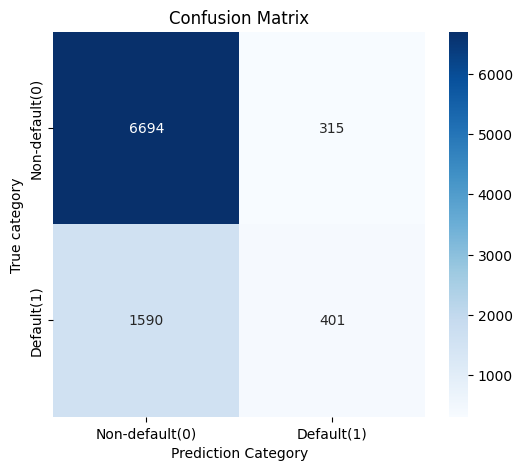

In [126]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediction Category')
plt.ylabel('True category')
plt.title('Confusion Matrix')
plt.show()


In [127]:
y_proba_rf = rf.predict_proba(X_test)[:,1]
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("Random Forest AUC:", auc_rf)


Random Forest AUC: 0.7132711053356884


In [128]:
import xgboost as xgb

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)


c:\Users\q\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [20:26:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


【XGBoost】Result: 
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      7009
           1       0.38      0.63      0.48      1991

    accuracy                           0.69      9000
   macro avg       0.63      0.67      0.63      9000
weighted avg       0.76      0.69      0.72      9000

Accuracy:  0.6935555555555556
Confusion Matrix: 
 [[4984 2025]
 [ 733 1258]]


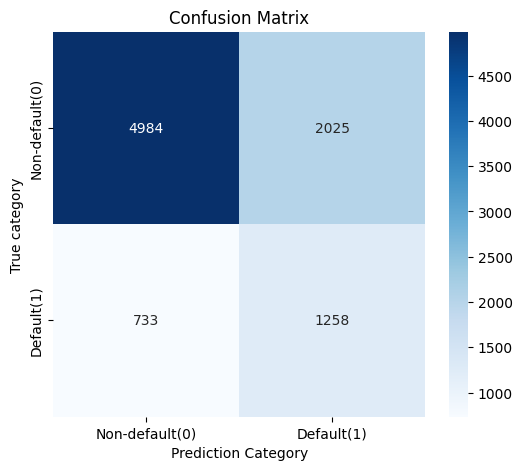

In [129]:
print("【XGBoost】Result: ")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediction Category')
plt.ylabel('True category')
plt.title('Confusion Matrix')
plt.show()


In [130]:
from sklearn.metrics import roc_auc_score, roc_curve

# 预测概率
y_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_proba_xgb)
print('XGBoost模型AUC:', auc)


XGBoost模型AUC: 0.7343597623175024


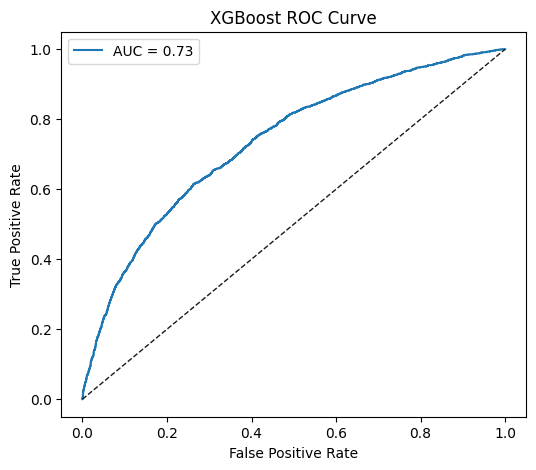

In [131]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()
